# <center> <h1> 🧑‍💻

# <center> SVM (Support Vector Machine) is a linear algorithm used in classification and regression problems. This algorithm is widely used in practice and can solve linear and non-linear problems. The operation of Support Vector Machines is simple: an algorithm draws a line or hyperplane dividing the data into classes.

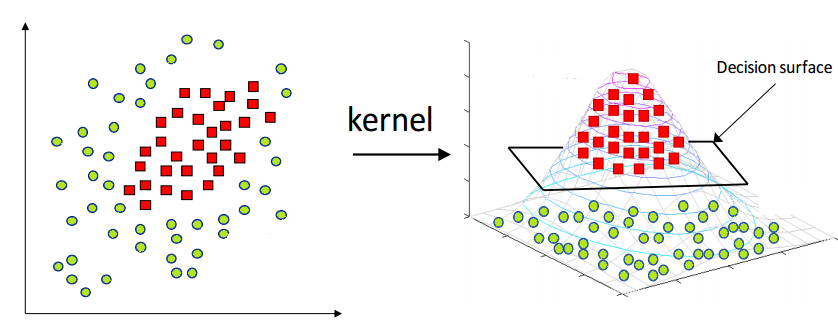

### <center> If we pay attention to the picture above, our data is Non-linear data, that is, if we draw a line for classification like a linear regression, it will not be straight, or if we try to use knn, it will not work very well, in such cases, it is better to use svm. Derived from SVM support vector classifier. What does the support vector classifier do? it draws a hyperplane that cuts through the middle of the two datums and plots the corresponding support vectors.

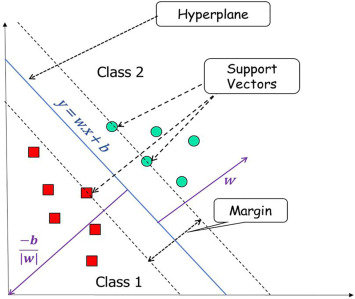

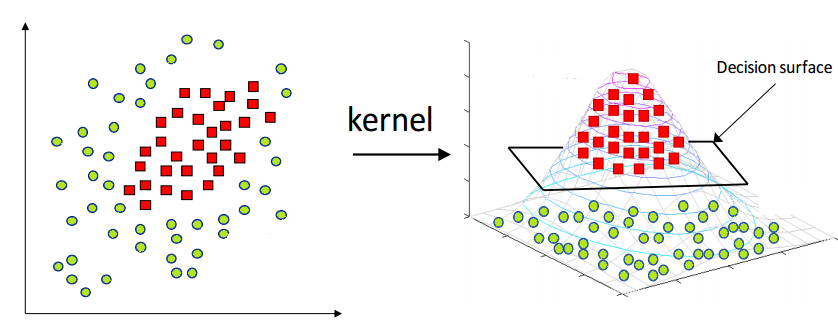

The support vector classifier cannot extract the classes as shown in the picture. A support vector classifier only draws a line or hyperplane and classifies accordingly. A kernel trick is needed for support vector machine. This kernel trick gives us low demision data into high demision data, that is, for example, it makes 2-dimensional data into 3-dimensional. To put it more simply, we have data consisting of numbers. The kernel itself is a different algorithm. Through this kernel, we transfer the data to high resolution data. During the train process, the parameters are adjusted depending on the type of kernel, for example, RBF is gamma in the kernel and is adjusted during the train process. In the test process, the top process is the dataset that comes and goes through the kernel, during the transition it goes up or down as shown in the figure and classifies accordingly.

In what cases should SVM be used?

* 1 - for classification
* 2 - for regression
* 3 - to find outlier data.



-------------

Support vector is such a vector that data points, i.e. the most extreme points of 2 classes, are support vectors for us.


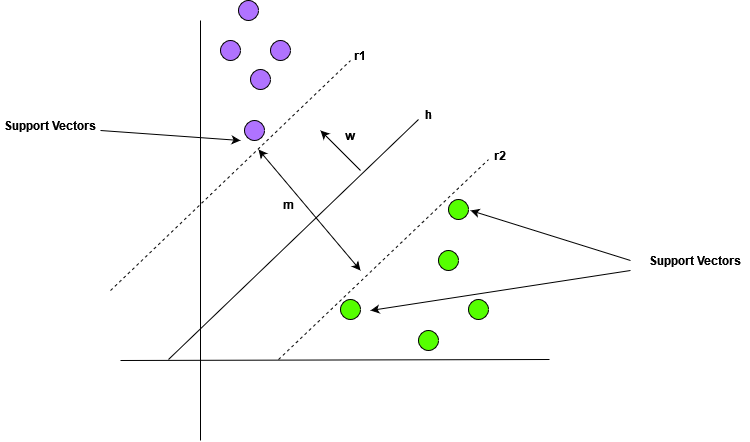

The hyperplane is chosen as follows, where there are two auxiliary vectors (the two extreme edges of the classinig, or the lines r1 and r2 in the figure above) that intersect them. This is called maximum margin classification. that is, the distance between h(hyperplane) and r1 and r2 should be maximum. What this means is that if we move the hyperplane to the top, the top will be close to the class, i.e. the minimum, so this maximum margin (the distance between h to r1 and h to r2) is called classification.


----------

Imagine we have data like the one above, it's black and green if we want to plot the support vector

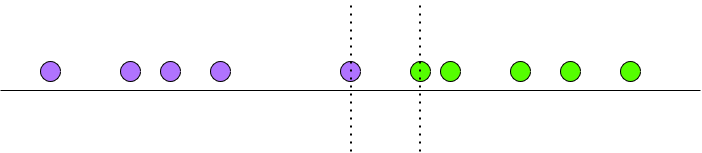

we can find the extreme points

Now if we find the hyperplane it will fall in the middle of the 2 extreme points (see the picture below how correct is this?)

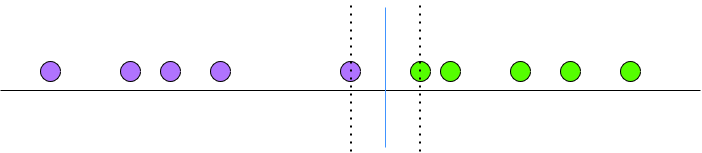

If new data arrives, it will be classified according to which direction it falls from this hyperplane.

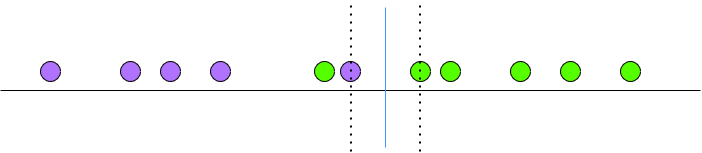

But we got 1 green like the picture above and it went from the hyperplane to the left i.e. to the inky side.
Note that the newly arrived green data is closer to the green set (closer to the set of green elements), but we have misclassified this data. In this case, maximum margin classification will not help us, but in this case, we can use GridSearchCV and select the best hyperplane. One advantage of SVM is that it allows for misclassifications, i.e. the hyperplane at the top and the distance between the vectors is very short, which should be a maximum, so in such cases, the most extreme point is from where more data is collected. the extreme point is taken.

See the picture below

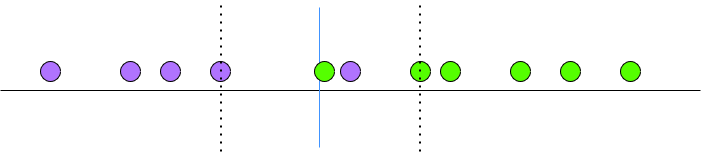

So we need the best hyperplane for classification in SVM. How do we find it?

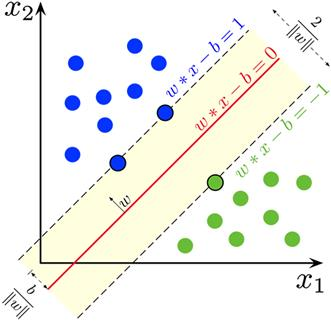

The mathematical representation is shown below

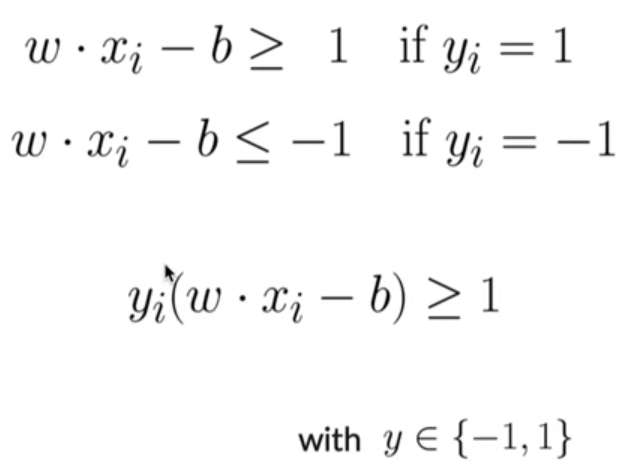

where x is the data, y is the prediction value, and the main weight

To find the weight, we need a loss function.

we use the Hinge loss function for this

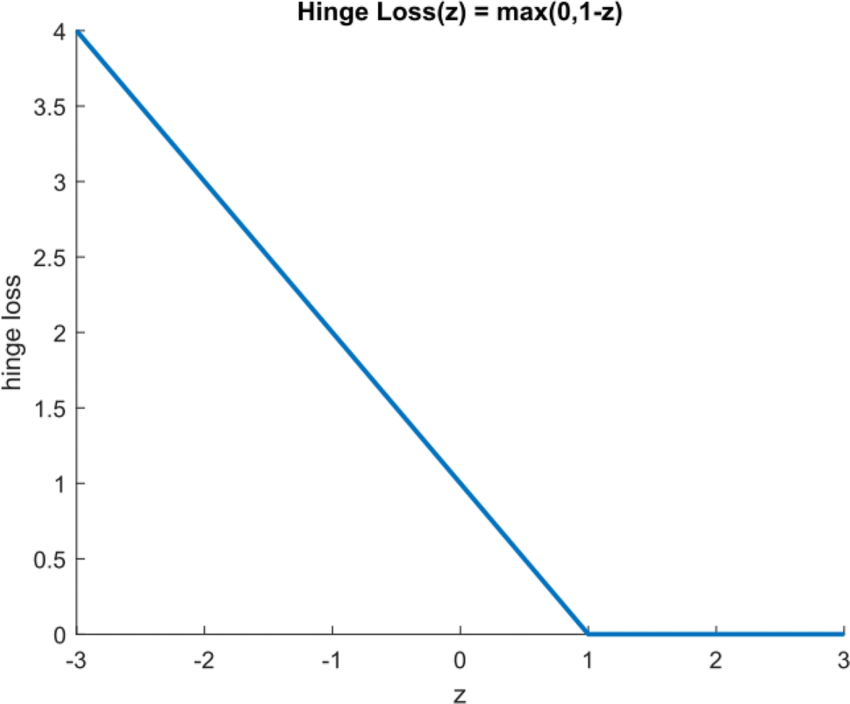

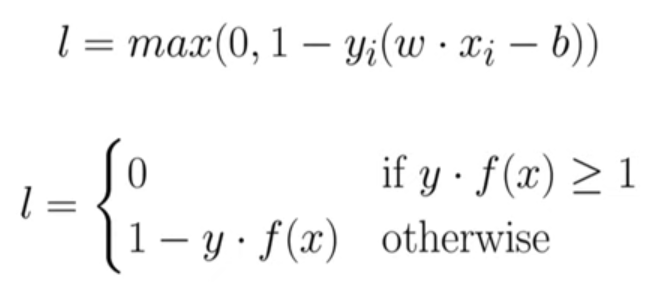

Now that we have found a Loss we need regularization.


In regularization, we add + lambda ||w||**2 to the sum of losses


Through this, we can know whether the data we are classifying is on the right side or not (that is, it is on the right side of the hyperplane or not). We could know this only through Loss, but regularization allows us to know it more clearly.

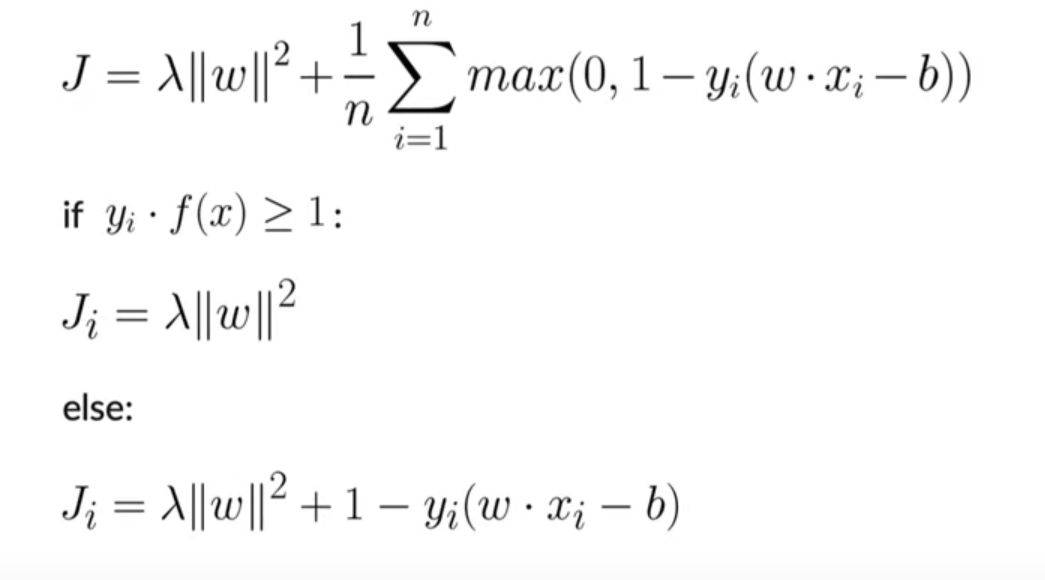

Now we stop to find weights

Here, too, we can first check which side we are on. If the condition is satisfied, 1 process is performed, if the condition is not satisfied, 2 processes are performed.

Here, the derivatives of regularization with respect to weight and bias are calculated.

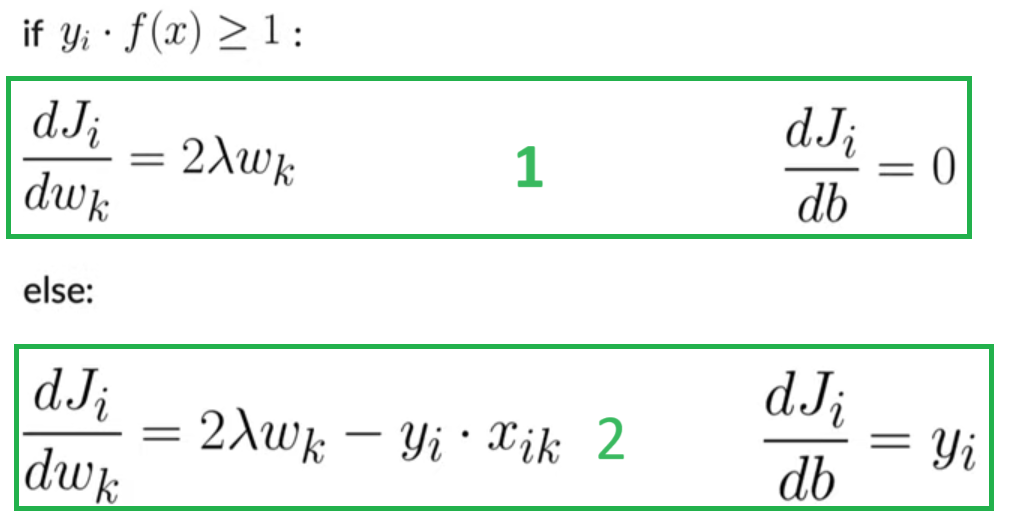

Now we can update the weights.

Here, like the ones above, we update the weiglts depending on the condition, that is, depending on which side we are from the hyperplane

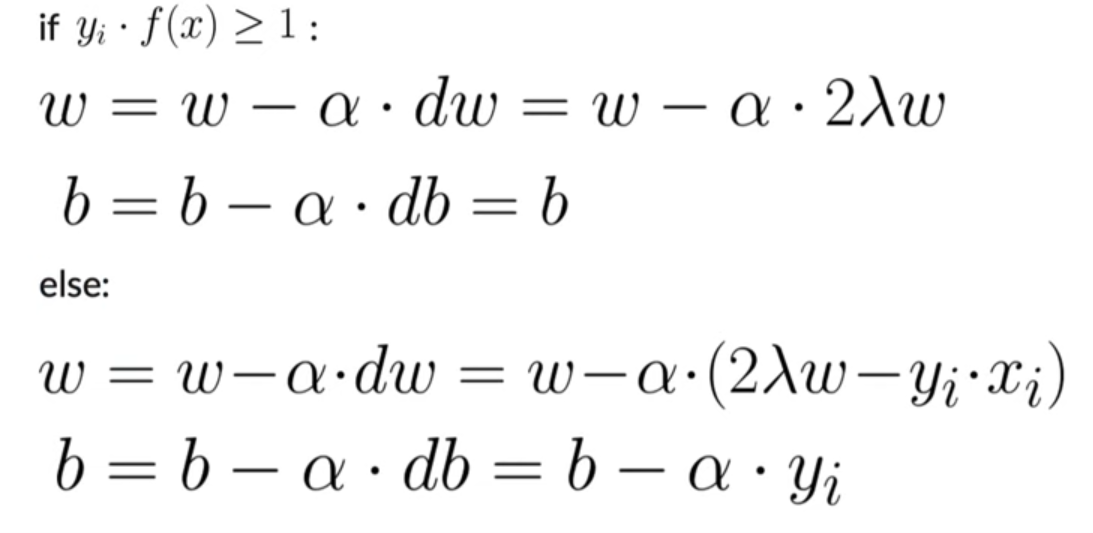

In this way, we try to find the optimal hyperplane

# <center> Implementation OpenCV

In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Datasets/Iris.csv")
data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [3]:
data = data[:100]
len(data)
# for convenience, we only take ta class

100

In [4]:
x_train = data[["SepalLengthCm", "SepalWidthCm",]].to_numpy()
y_train = data[["Species"]].to_numpy()
# for convenience, we take only 2 columns

In [5]:
x_train = [x_train[i] for i in range(100)]
y_train = [y_train[i] for i in range(100)]
# We are taking Iris-setosa and Iris-versicolor classes

In [6]:
x_train

[array([5.1, 3.5]),
 array([4.9, 3. ]),
 array([4.7, 3.2]),
 array([4.6, 3.1]),
 array([5. , 3.6]),
 array([5.4, 3.9]),
 array([4.6, 3.4]),
 array([5. , 3.4]),
 array([4.4, 2.9]),
 array([4.9, 3.1]),
 array([5.4, 3.7]),
 array([4.8, 3.4]),
 array([4.8, 3. ]),
 array([4.3, 3. ]),
 array([5.8, 4. ]),
 array([5.7, 4.4]),
 array([5.4, 3.9]),
 array([5.1, 3.5]),
 array([5.7, 3.8]),
 array([5.1, 3.8]),
 array([5.4, 3.4]),
 array([5.1, 3.7]),
 array([4.6, 3.6]),
 array([5.1, 3.3]),
 array([4.8, 3.4]),
 array([5., 3.]),
 array([5. , 3.4]),
 array([5.2, 3.5]),
 array([5.2, 3.4]),
 array([4.7, 3.2]),
 array([4.8, 3.1]),
 array([5.4, 3.4]),
 array([5.2, 4.1]),
 array([5.5, 4.2]),
 array([4.9, 3.1]),
 array([5. , 3.2]),
 array([5.5, 3.5]),
 array([4.9, 3.1]),
 array([4.4, 3. ]),
 array([5.1, 3.4]),
 array([5. , 3.5]),
 array([4.5, 2.3]),
 array([4.4, 3.2]),
 array([5. , 3.5]),
 array([5.1, 3.8]),
 array([4.8, 3. ]),
 array([5.1, 3.8]),
 array([4.6, 3.2]),
 array([5.3, 3.7]),
 array([5. , 3.3]),
 a

In [7]:
y_train

[array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], dtype=object),
 array(['Iris-setosa'], d

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [10]:
y_train = np.where(y_train == 'Iris-setosa', 0, 1)  # Classlarni (y qiymatlarni) decode qilib olamiz(sonlik ko'rinishga o'tkazib olamiz)
y_train


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [11]:
y_train = y_train.reshape(100)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
import plotly.graph_objects as go

In [13]:
nuqtalar = go.Scatter(x=x_train[:,0], y=x_train[:,1] ,mode='markers',marker = dict(size = 10,color = y_train,colorscale = 'plasma'))
data=[nuqtalar]

layout = go.Layout()
fig = go.Figure(data=data,layout=layout)
fig.show()

# we can see the location of our points


In [15]:
r = (-(x_train ** 2).sum(1))    # we can make our data high dimension data
r
# our data was 2-dimensional i.e. it consisted only of SepalLengthCm, SepalWidthCm values
# we made it 3D. To do this, we raised the values of x_train to the power of 2 and added them


array([-38.26, -33.01, -32.33, -30.77, -37.96, -44.37, -32.72, -36.56,
       -27.77, -33.62, -42.85, -34.6 , -32.04, -27.49, -49.64, -51.85,
       -44.37, -38.26, -46.93, -40.45, -40.72, -39.7 , -34.12, -36.9 ,
       -34.6 , -34.  , -36.56, -39.29, -38.6 , -32.33, -32.65, -40.72,
       -43.85, -47.89, -33.62, -35.24, -42.5 , -33.62, -28.36, -37.57,
       -37.25, -25.54, -29.6 , -37.25, -40.45, -32.04, -40.45, -31.4 ,
       -41.78, -35.89, -59.24, -51.2 , -57.22, -35.54, -50.09, -40.33,
       -50.58, -29.77, -51.97, -34.33, -29.  , -43.81, -40.84, -45.62,
       -39.77, -54.5 , -40.36, -40.93, -43.28, -37.61, -45.05, -45.05,
       -45.94, -45.05, -49.37, -52.56, -54.08, -53.89, -44.41, -39.25,
       -36.01, -36.01, -40.93, -43.29, -38.16, -47.56, -54.5 , -44.98,
       -40.36, -36.5 , -37.01, -46.21, -40.4 , -30.29, -38.65, -41.49,
       -40.9 , -46.85, -32.26, -40.33])

In [16]:
r.shape

(100,)

In [17]:
nuqtalar = go.Scatter3d(x=x_train[:,0], y=x_train[:,1],z=r,mode='markers',marker = dict(size = 5,color = y_train,colorscale = 'plasma')) 
data=[nuqtalar]
fig = go.Figure(data=data,layout={})
fig.show()

# now we see our 3D date



In [18]:
x_train = np.insert(x_train,2,r,axis=1)
x_train
# We also add column 3 r to x_train

array([[  5.1 ,   3.5 , -38.26],
       [  4.9 ,   3.  , -33.01],
       [  4.7 ,   3.2 , -32.33],
       [  4.6 ,   3.1 , -30.77],
       [  5.  ,   3.6 , -37.96],
       [  5.4 ,   3.9 , -44.37],
       [  4.6 ,   3.4 , -32.72],
       [  5.  ,   3.4 , -36.56],
       [  4.4 ,   2.9 , -27.77],
       [  4.9 ,   3.1 , -33.62],
       [  5.4 ,   3.7 , -42.85],
       [  4.8 ,   3.4 , -34.6 ],
       [  4.8 ,   3.  , -32.04],
       [  4.3 ,   3.  , -27.49],
       [  5.8 ,   4.  , -49.64],
       [  5.7 ,   4.4 , -51.85],
       [  5.4 ,   3.9 , -44.37],
       [  5.1 ,   3.5 , -38.26],
       [  5.7 ,   3.8 , -46.93],
       [  5.1 ,   3.8 , -40.45],
       [  5.4 ,   3.4 , -40.72],
       [  5.1 ,   3.7 , -39.7 ],
       [  4.6 ,   3.6 , -34.12],
       [  5.1 ,   3.3 , -36.9 ],
       [  4.8 ,   3.4 , -34.6 ],
       [  5.  ,   3.  , -34.  ],
       [  5.  ,   3.4 , -36.56],
       [  5.2 ,   3.5 , -39.29],
       [  5.2 ,   3.4 , -38.6 ],
       [  4.7 ,   3.2 , -32.33],
       [  

In [20]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [21]:
model = LinearSVC(C=1.0, loss='hinge')  # We will create a support vector classifier. We use Hinge loss as mentioned above
clf = model.fit(x_train, y_train)  # we train the model


D:\IT\Python\Vir3\bir\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

D:\IT\Python\Vir3\bir\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [22]:
Z = lambda X,Y: (-clf.intercept_[0]-clf.coef_[0][0]*X-clf.coef_[0][1]*Y) / clf.coef_[0][2]

# intercept_ =  bias
# coef_ =  weights

# The equation of the dividing plane was (w*x-b)=0 and in general view
# will be np.dot(svc.coef_[0], x) + b = 0.



In [23]:
nuqtalar1 = go.Mesh3d(x = x_train[:,0], y = x_train[:,1], z = Z(x_train[:,0],x_train[:,1])) 
nuqtalar2 = go.Scatter3d(x=x_train[:,0], y=x_train[:,1],z=x_train[:,2],mode='markers',marker = dict(size = 3,color = y_train,colorscale = 'plasma')) 
data=[nuqtalar1,nuqtalar2]
fig = go.Figure(data=data,layout={})
fig.show()


# Below you can see our data and hyerplane


# <center> <h1>  👨‍💻   🚀  